# 数据挖掘作业 1 数据探索性分析与预处理

**姓名：李懿**

**学号：2120151008**

**日期：2016.5.28**

### 数据分析要求

**1. 数据可视化和摘要**

- 数据摘要

对标称属性，给出每个可能取值的频数

对数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

- 数据的可视化

针对数值属性：

绘制直方图，如mxPH，用qq图检验其分布是否为正态分布。

绘制盒图，对离群值进行识别。

对7种海藻，分别绘制其数量与标称变量，如size的条件盒图

**2. 数据缺失的处理**

- 分别使用下列四种策略对缺失值进行处理，处理后可视化地对比新旧数据集。

1.将缺失部分剔除
2.用最高频率值来填补缺失值
3.通过属性的相关关系来填补缺失值
4.通过数据对象之间的相似性来填补缺失值

### 解答内容

In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import operator
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Step1. 数据处理**

- 将原始txt文件转换为易于处理的csv文件

In [4]:
# 转换文件格式，生成csv文件
fp_origin = open("./data_origin/Analysis.txt", 'r')
fp_modified = open("./data_origin/Analysis.csv", 'w')

line = fp_origin.readline()
while(line):
    temp = line.strip().split()
    temp = ','.join(temp)+'\n'
    fp_modified.write(temp)
    line = fp_origin.readline()
    
fp_origin.close()
fp_modified.close()

**Step2. 读取数据**

- 读取csv文件，生成data frame

In [5]:
# 定义两类数据：标称型和数值型
name_category = ["season", "river_size", "river_speed"]
name_value = ["mxPH", "mnO2", "Cl", "NO3", "NH4", "oPO4", "PO4", "Chla", "a1", "a2", "a3", "a4", "a5", "a6", "a7"]
# 存储7种海藻对应的名称
name_seaweed = ["a1", "a2", "a3", "a4", "a5", "a6", "a7"]

# 读取数据
data_origin = pd.read_csv("./data_origin/Analysis.csv", 
                   names = name_category+name_value,
                   na_values = "XXXXXXX")

# 将字符数据转换为category
for item in name_category:
    data_origin[item] = data_origin[item].astype('category')

# 查看前10条数据内容
data_origin.iloc[:10]

,season,river_size,river_speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
5,winter,small,high,8.25,13.1,65.750,9.248,430.00000,18.250,56.66700,28.400,15.1,14.6,1.4,0.0,22.5,12.6,2.9
6,summer,small,high,8.15,10.3,73.250,1.535,110.00000,61.250,111.75000,3.200,2.4,1.2,3.2,3.9,5.8,6.8,0.0
7,autumn,small,high,8.05,10.6,59.067,4.990,205.66701,44.667,77.43400,6.900,18.2,1.6,0.0,0.0,5.5,8.7,0.0
8,winter,small,medium,8.70,3.4,21.950,0.886,102.75000,36.300,71.00000,5.544,25.4,5.4,2.5,0.0,0.0,0.0,0.0
9,winter,small,high,7.93,9.9,8.000,1.390,5.80000,27.250,46.60000,0.800,17.0,0.0,0.0,2.9,0.0,0.0,1.7


**Step 3. 数据摘要**

- 对标称属性，给出每个可能取值的频数

In [6]:
# 使用value_counts函数统计每个标称属性的取值频数
for item in name_category:
    print item, '的频数为：\n', pd.value_counts(data_origin[item].values), '\n'

season 的频数为：
winter    62
spring    53
summer    45
autumn    40
dtype: int64 

river_size 的频数为：
medium    84
small     71
large     45
dtype: int64 

river_speed 的频数为：
high      84
medium    83
low       33
dtype: int64 



- 对数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

In [7]:
# 最大值
data_show = pd.DataFrame(data = data_origin[name_value].max(), columns = ['max'])
# 最小值
data_show['min'] = data_origin[name_value].min()
# 均值
data_show['mean'] = data_origin[name_value].mean()
# 中位数
data_show['median'] = data_origin[name_value].median()
# 四分位数
data_show['quartile'] = data_origin[name_value].describe().loc['25%']
# 缺失值个数
data_show['missing'] = data_origin[name_value].describe().loc['count'].apply(lambda x : 200-x)

In [8]:
data_show

,max,min,mean,median,quartile,missing
mxPH,9.70000,5.600,8.011734,8.0600,7.70000,1.0
mnO2,13.40000,1.500,9.117778,9.8000,7.72500,2.0
Cl,391.50000,0.222,43.636279,32.7300,10.98125,10.0
NO3,45.65000,0.050,3.282389,2.6750,1.29600,2.0
NH4,24064.00000,5.000,501.295828,103.1665,38.33325,2.0
oPO4,564.59998,1.000,73.590596,40.1500,15.70000,2.0
PO4,771.59998,1.000,137.882101,103.2855,41.37525,2.0
Chla,110.45600,0.200,13.971197,5.4750,2.00000,12.0
a1,89.80000,0.000,16.923500,6.9500,1.50000,0.0
a2,72.60000,0.000,7.458500,3.0000,0.00000,0.0


**Step 4. 数据可视化 **

- 针对数值属性：
绘制直方图，如mxPH，用qq图检验其分布是否为正态分布。

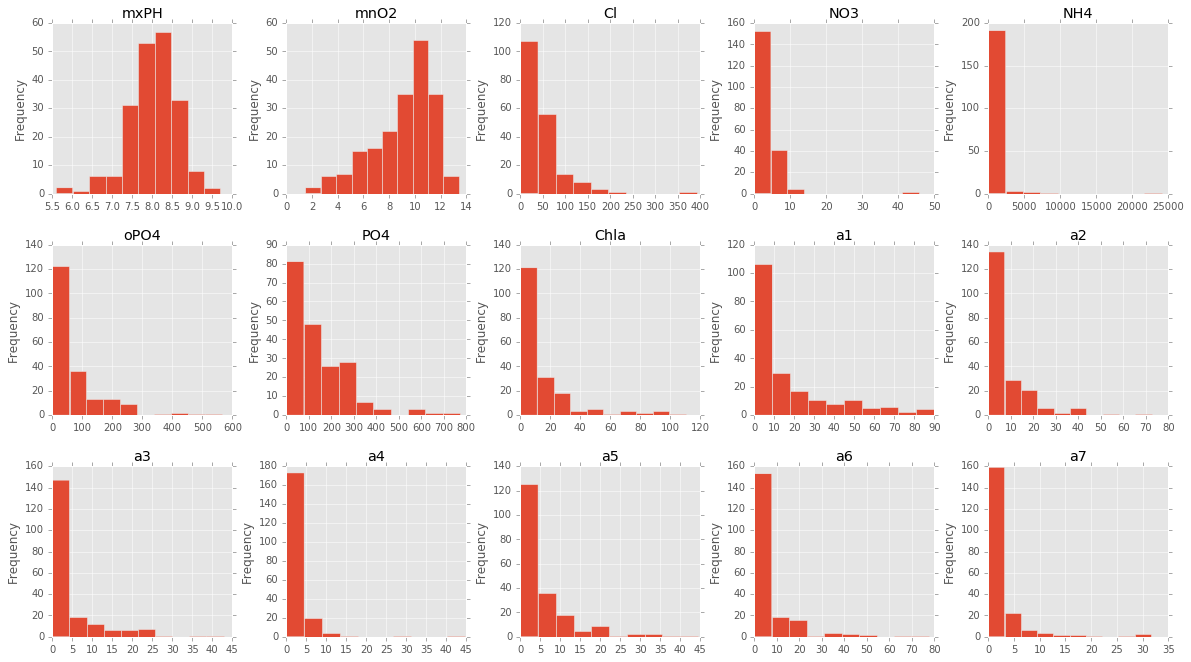

In [9]:
# 直方图
fig = plt.figure(figsize = (20,11))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    data_origin[item].plot(kind = 'hist', title = item, ax = ax)
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
fig.savefig('./image/histogram.jpg')

从qq图中可以看出，只有mxPH和mnO2两项值符合正态分布，其他值均不符合

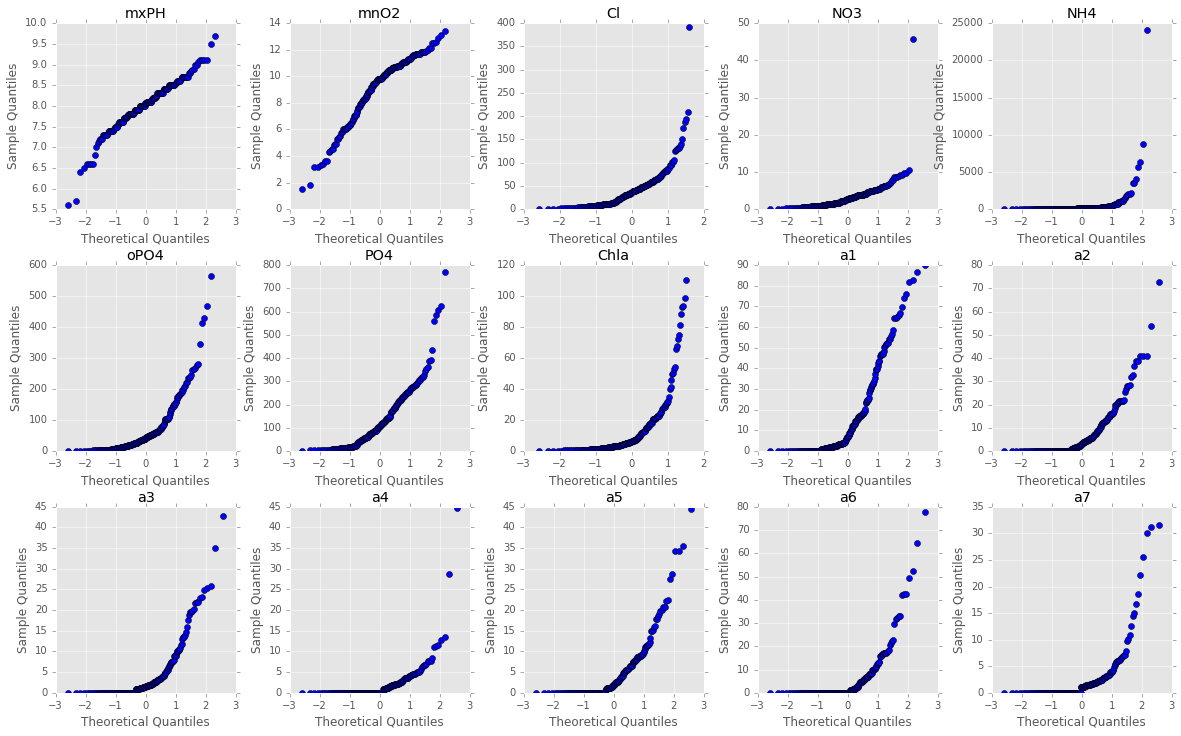

In [10]:
# qq图
fig = plt.figure(figsize = (20,12))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    sm.qqplot(data_origin[item], ax = ax)
    ax.set_title(item)
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
fig.savefig('./image/qqplot.jpg')

从qq图中可以看出，只有mxPH和mnO2两项值符合正态分布，其他值均不符合

- 绘制盒图，对离群值进行识别。

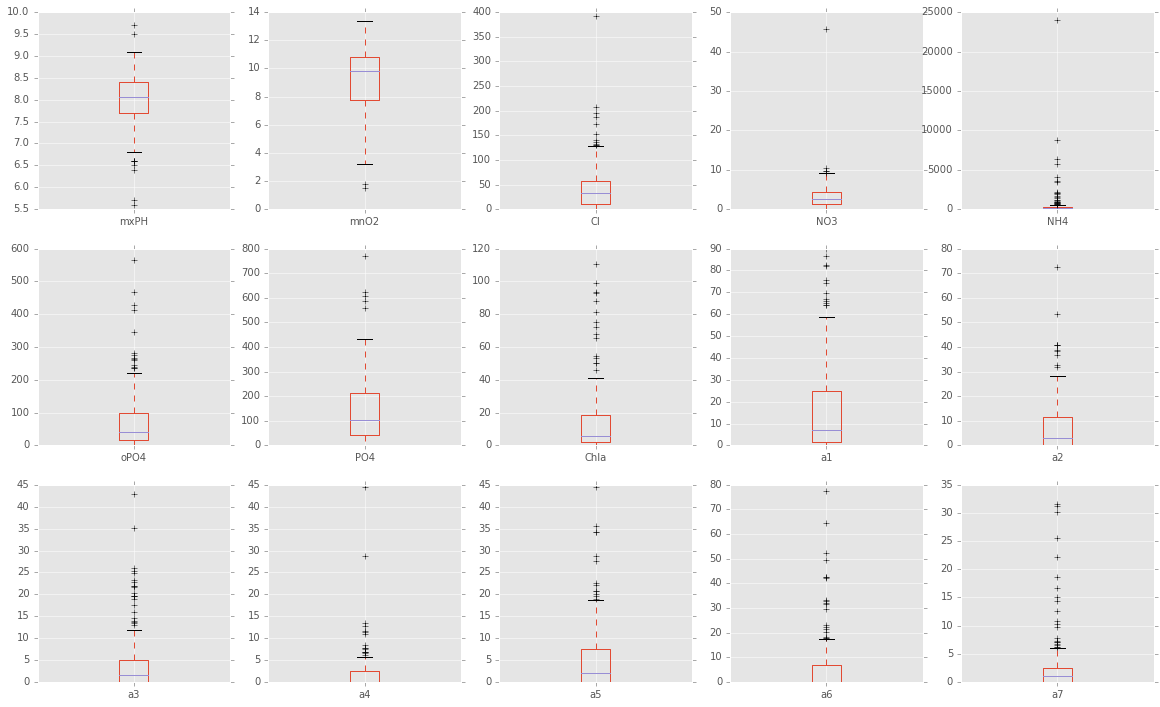

In [11]:
# 盒图
fig = plt.figure(figsize = (20,12))
i = 1
for item in name_value:
    ax = fig.add_subplot(3, 5, i)
    data_origin[item].plot(kind = 'box')
    i += 1
fig.savefig('./image/boxplot.jpg')

- 对7种海藻，分别绘制其数量与标称变量，如size的条件盒图

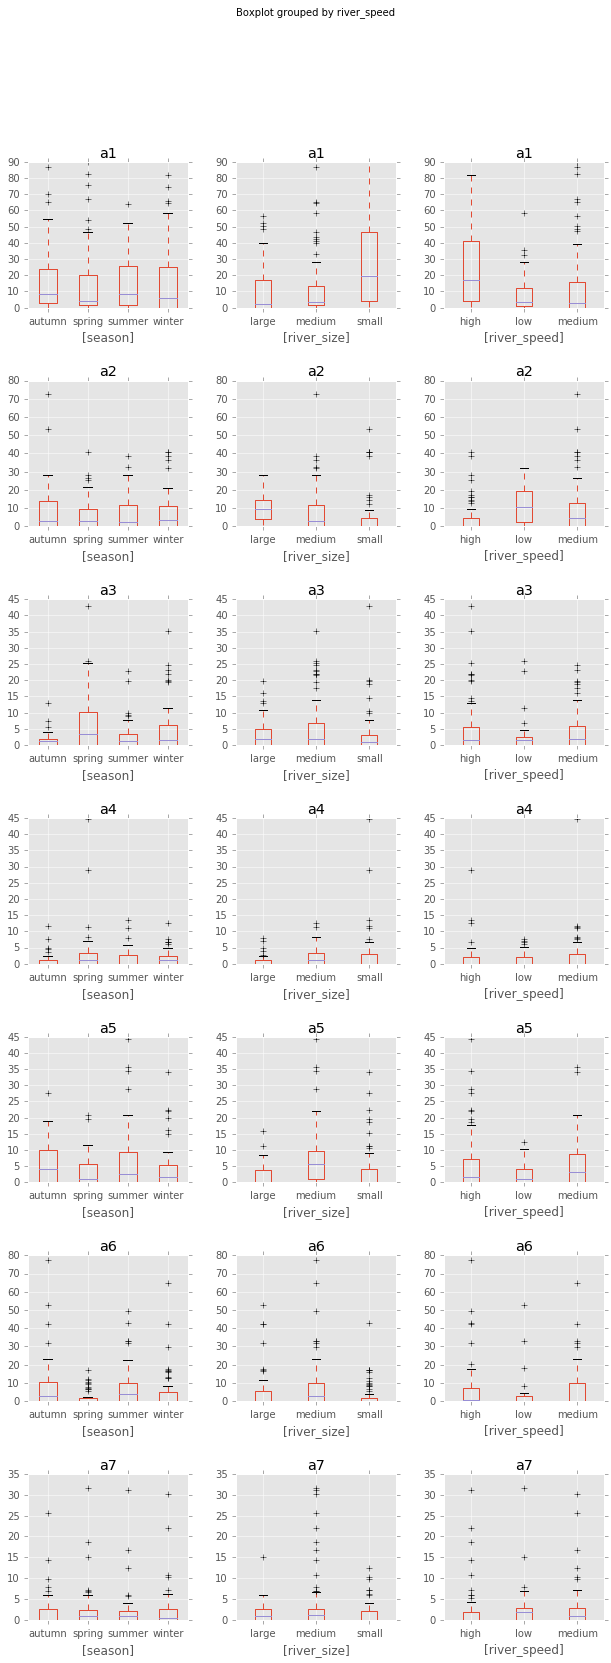

In [12]:
# 条件盒图
fig = plt.figure(figsize = (10, 27))
i = 1
for seaweed in name_seaweed:
    for category in name_category:
        ax = fig.add_subplot(7, 3, i)
        data_origin[[seaweed, category]].boxplot(by = category, ax = ax)
        ax.set_title(seaweed)
        i += 1
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
fig.savefig('./image/boxplot_condition.jpg')

**Step 4. 数据缺失的处理**

可视化方法：对于**标称属性**，绘制属性的折线图，图中红线是原始数据，蓝线是处理完缺失值之后的数据；**数值属性**：使用直方图，将原始数据和处理后的数据图像进行叠加。图中红色的垂线是原始数据的均值，蓝色的垂线是处理完缺失值之后的均值。

4.0 观察数据

从绘制的表格上可以看出，缺失值主要集中在Cl、Chla两个属性，第62、199条数据缺失情况比较严重

In [13]:
# 找出含有缺失值的数据条目索引值
nan_list = pd.isnull(data_origin).any(1).nonzero()[0]

# 显示含有缺失值的原始数据条目
data_origin.iloc[nan_list].style.highlight_null(null_color='red')

4.1 将缺失部分剔除

使用***dropna()***函数操作。从结果可以看出，由于删除了带有缺失值的整条数据。

从标称属性的折线图，可以明显看出处理后的数据量减少；直方图中，蓝色线和红色线不重合，但是十分接近，说明数值属性的均值有改变，但是变化不大。

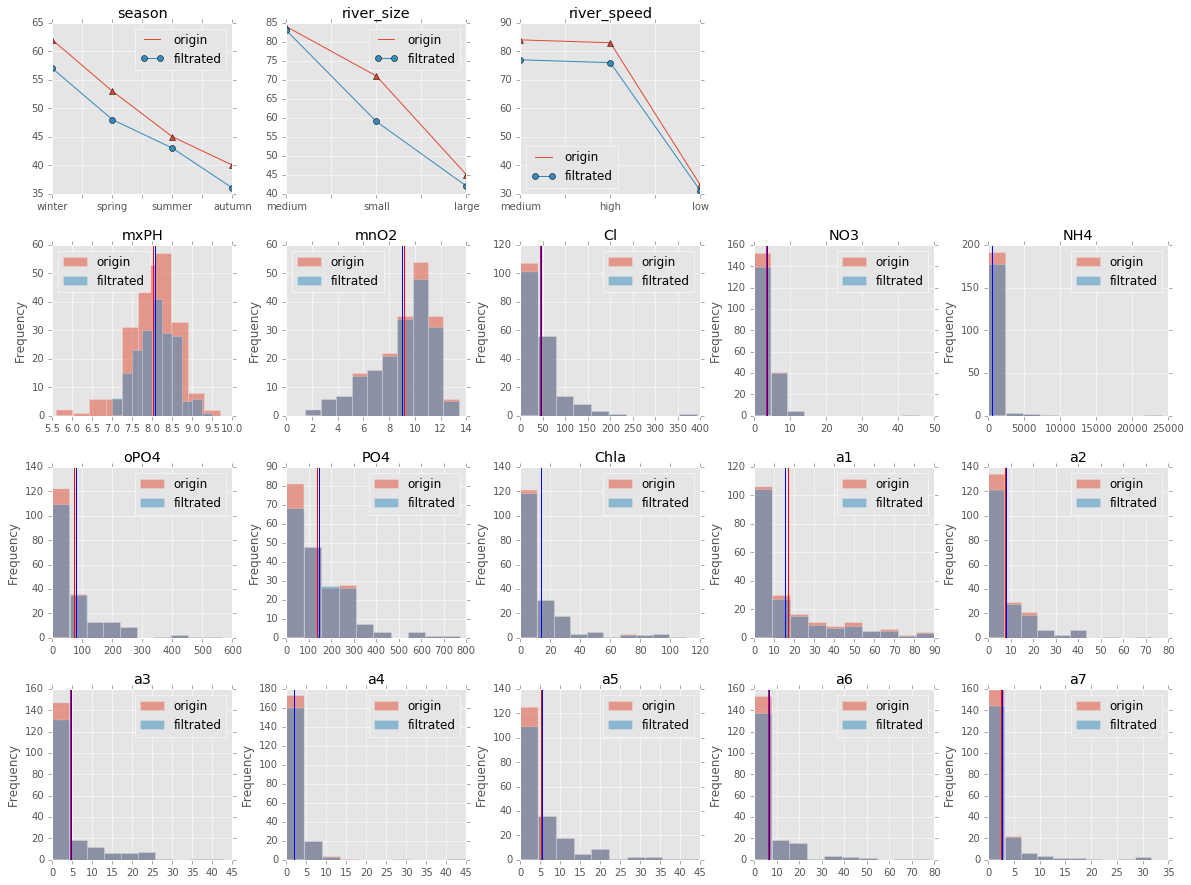

In [17]:
# 将缺失值对应的数据整条剔除，生成新数据集
data_filtrated = data_origin.dropna()

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1

i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'filtrated', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_delete.jpg')
data_filtrated.to_csv('./data_output/missing_data_delete.csv', mode = 'w', encoding='utf-8', index = False,header = False)

4.2 用最高频率值来填补缺失值

使用***value_counts()***函数统计原始数据中，出现频率最高的值，再用***fillna()***函数将缺失值替换为最高频率值。

从折线图看出，处理后标称属性值不变；从直方图可以看出，数值属性的缺失值补全为高频值，均值基本保持不变。

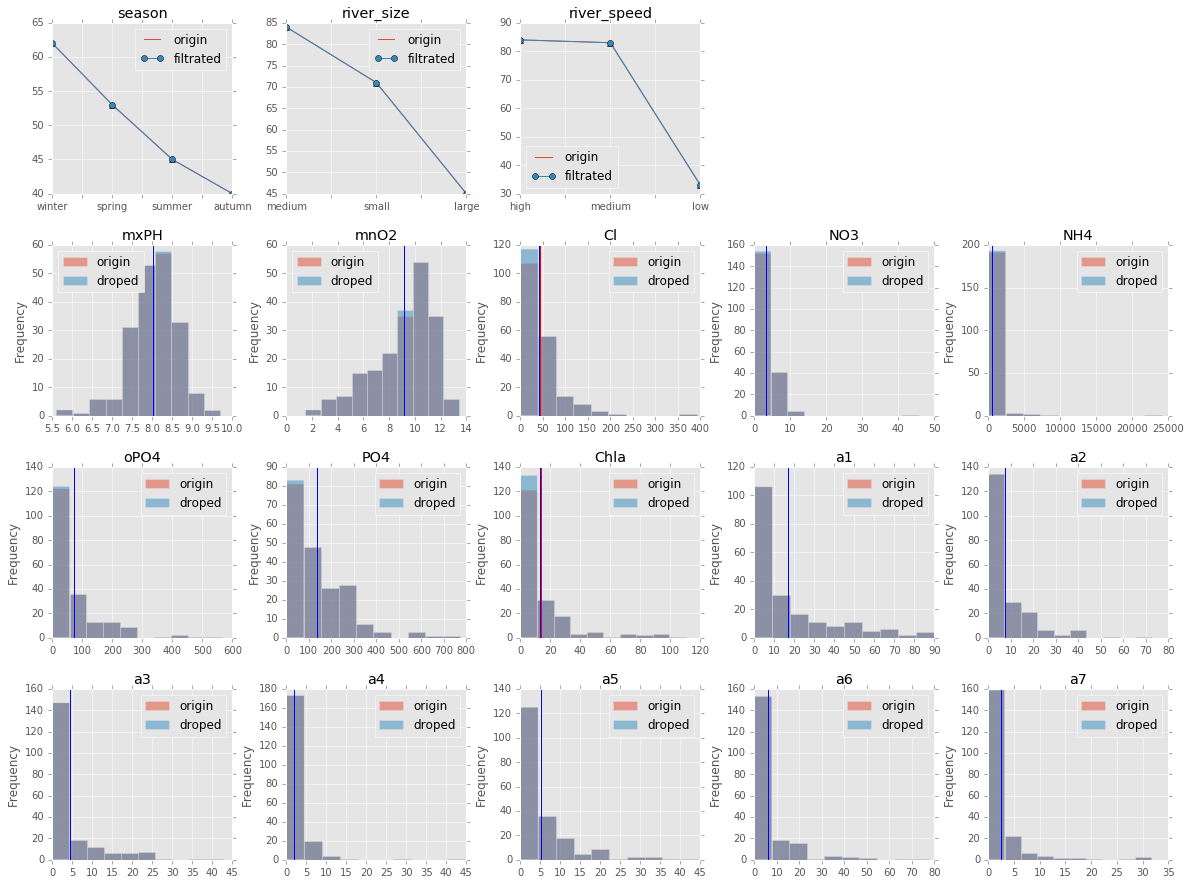

In [19]:
# 建立原始数据的拷贝
data_filtrated = data_origin.copy()
# 对每一列数据，分别进行处理
for item in name_category+name_value:
    # 计算最高频率的值
    most_frequent_value = data_filtrated[item].value_counts().idxmax()
    # 替换缺失值
    data_filtrated[item].fillna(value = most_frequent_value, inplace = True)

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1    

i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_most.jpg')
data_filtrated.to_csv('./data_output/missing_data_most.csv', mode = 'w', encoding='utf-8', index = False,header = False)

4.3 通过属性的相关关系来填补缺失值

使用pandas中Series的***interpolate()***函数，对数值属性进行插值计算，并替换缺失值。

从直方图中可以看出，处理后的数据，添加了若干个值不同的值，并且均值变化不大。

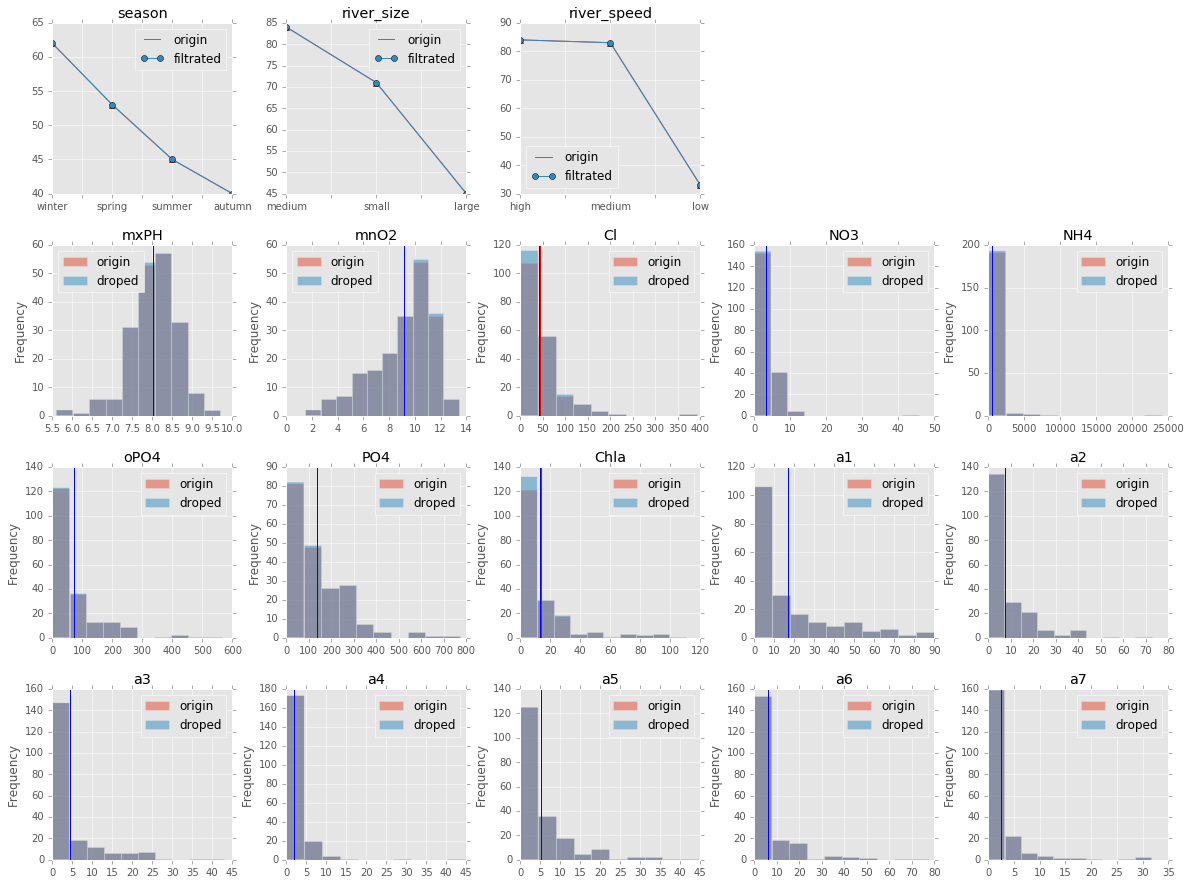

In [20]:
# 建立原始数据的拷贝
data_filtrated = data_origin.copy()
# 对数值型属性的每一列，进行插值运算
for item in name_value:
    data_filtrated[item].interpolate(inplace = True)

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1   
    
i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_corelation.jpg')
data_filtrated.to_csv('./data_output/missing_data_corelation.csv', mode = 'w', encoding='utf-8', index = False,header = False)

4.4 通过数据对象之间的相似性来填补缺失值

首先将缺失值设为0，对数据集进行正则化。然后对每两条数据进行差异性计算（分值越高差异性越大）。计算标准为：标称数据不相同记为1分，数值数据差异性分数为数据之间的差值。在处理缺失值时，找到和该条数据对象差异性最小（分数最低）的对象，将最相似的数据条目中对应属性的值替换缺失值。

从直方图可以看出，mnO2、Cl、Chla的值发生了改变

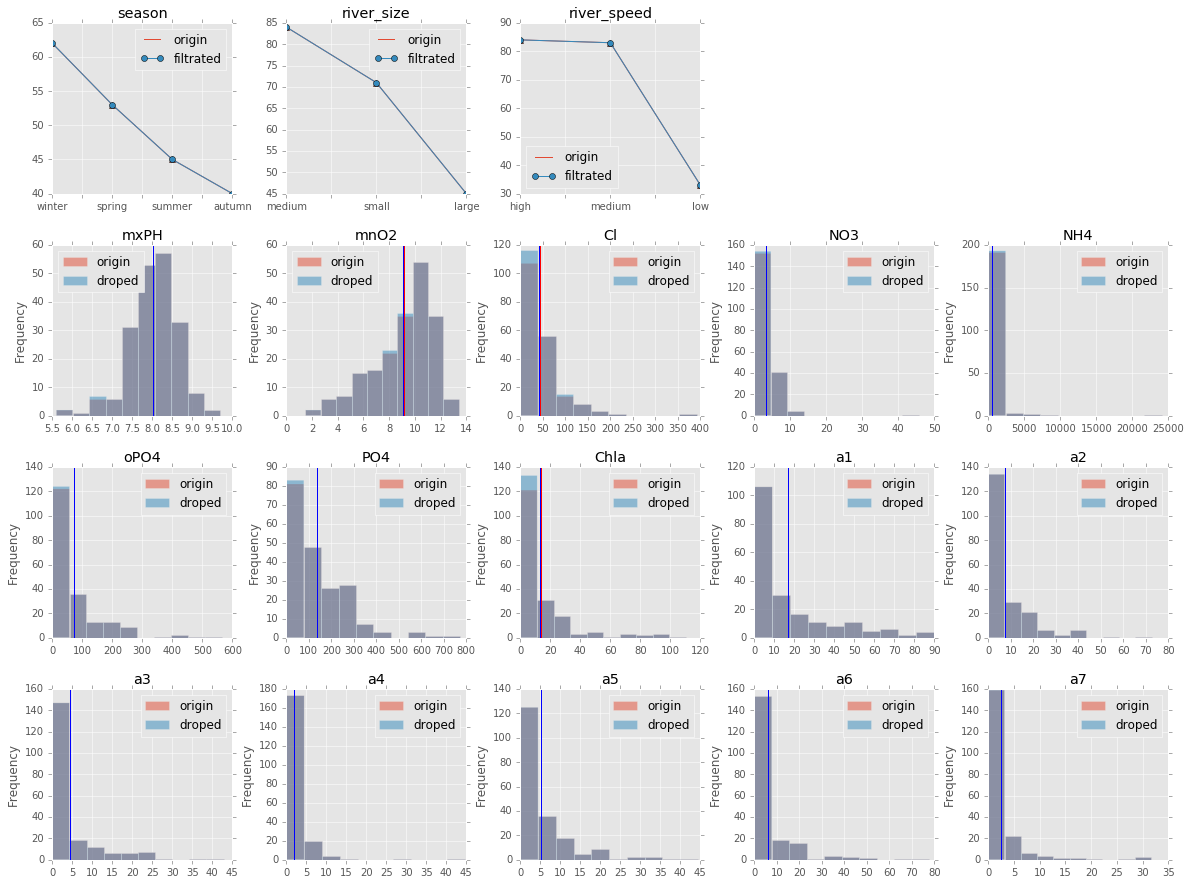

In [21]:
# 建立原始数据的拷贝，用于正则化处理
data_norm = data_origin.copy()
# 将数值属性的缺失值替换为0
data_norm[name_value] = data_norm[name_value].fillna(0)
# 对数据进行正则化
data_norm[name_value] = data_norm[name_value].apply(lambda x : (x - np.mean(x)) / (np.max(x) - np.min(x)))

# 构造分数表
score = {}
range_length = len(data_origin)
for i in range(0, range_length):
    score[i] = {}
    for j in range(0, range_length):
        score[i][j] = 0    

# 在处理后的数据中，对每两条数据条目计算差异性得分，分值越高差异性越大
for i in range(0, range_length):
    for j in range(i, range_length):
        for item in name_category:
            if data_norm.iloc[i][item] != data_norm.iloc[j][item]:
                score[i][j] += 1
        for item in name_value:
            temp = abs(data_norm.iloc[i][item] - data_norm.iloc[j][item])
            score[i][j] += temp
        score[j][i] = score[i][j]

# 建立原始数据的拷贝
data_filtrated = data_origin.copy()

# 对有缺失值的条目，用和它相似度最高（得分最低）的数据条目中对应属性的值替换
for index in nan_list:
    best_friend = sorted(score[index].items(), key=operator.itemgetter(1), reverse = False)[1][0]
    for item in name_value:
        if pd.isnull(data_filtrated.iloc[index][item]):
            if pd.isnull(data_origin.iloc[best_friend][item]):
                data_filtrated.ix[index, item] = data_origin[item].value_counts().idxmax()
            else:
                data_filtrated.ix[index, item] = data_origin.iloc[best_friend][item]

# 绘制可视化图
fig = plt.figure(figsize = (20,15))

i = 1
# 对标称属性，绘制折线图
for item in name_category:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    pd.value_counts(data_origin[item].values).plot(ax = ax, marker = '^', label = 'origin', legend = True)
    pd.value_counts(data_filtrated[item].values).plot(ax = ax, marker = 'o', label = 'filtrated', legend = True)
    i += 1   
    
i = 6
# 对数值属性，绘制直方图
for item in name_value:
    ax = fig.add_subplot(4, 5, i)
    ax.set_title(item)
    data_origin[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'origin', legend = True)
    data_filtrated[item].plot(ax = ax, alpha = 0.5, kind = 'hist', label = 'droped', legend = True)
    ax.axvline(data_origin[item].mean(), color = 'r')
    ax.axvline(data_filtrated[item].mean(), color = 'b')
    i += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 保存图像和处理后数据
fig.savefig('./image/missing_data_similarity.jpg')
data_filtrated.to_csv('./data_output/missing_data_similarity.csv', mode = 'w', encoding='utf-8', index = False,header = False)